## Simple Linear Regression Model

In simple linear regression, we predict the output/dependent variable based on only one input feature. The simple linear regression is given by

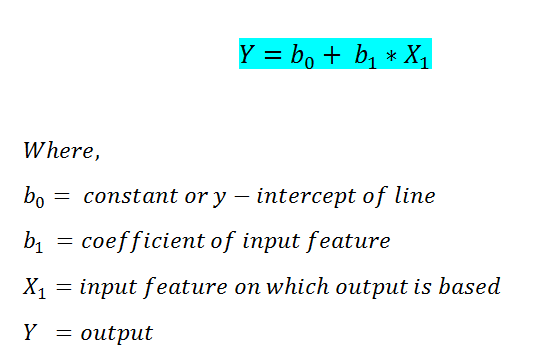

In [29]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import sklearn.metrics

In [2]:
# Read the CSV file :
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Let's select some features to explore more :
data = data[["ENGINESIZE","CO2EMISSIONS"]]

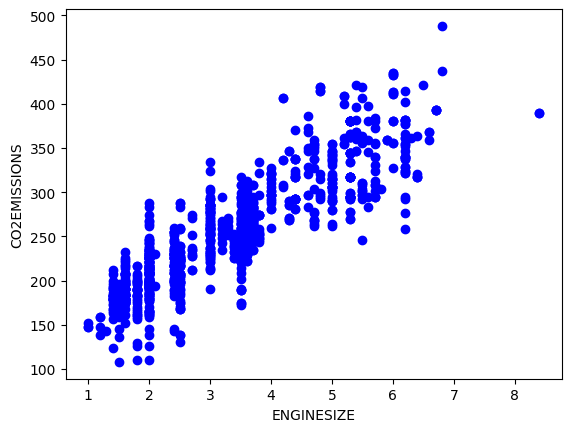

In [4]:
# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [5]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

To check the accuracy of a model, we are going to divide our data into training and testing datasets. We will use training data to train our model, and then we will check the accuracy of our model using the testing dataset.



In [10]:
print("The original shape of the data is -",data.shape)
print("The shape of the training data is -", train.shape)
print("The shape of the testing data is -", test.shape)

The original shape of the data is - (1067, 2)
The shape of the training data is - (853, 2)
The shape of the testing data is - (214, 2)


In [11]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression()

In [12]:
# The coefficients:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept

coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


Text(0, 0.5, 'Emission')

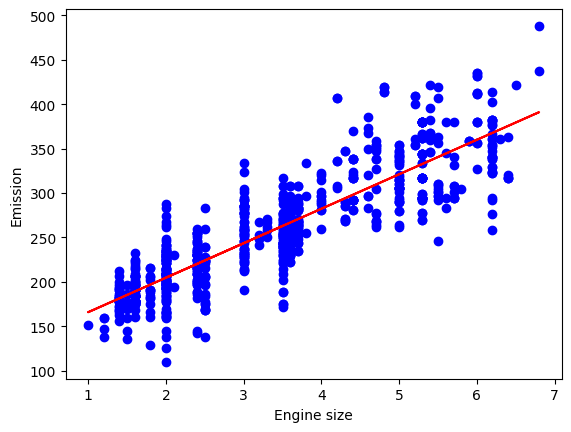

In [18]:
# Plotting the regression line:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Based on the coefficients, we can plot the best fit line for our dataset.



In [15]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

We are going to use a prediction function for our testing dataset.



In [16]:
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size, regr.intercept_[0],r egr.coef_[0][0])

print("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350173


In [33]:
# Checking various accuracy:

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
y_pred = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , test_y) )

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71


In [40]:
print("R2 Score - ",sklearn.metrics.r2_score(y_pred, test_y))
print("MSE Score - ", sklearn.metrics.mean_squared_error(y_pred, test_y))
print("RMSE Score - ", (sklearn.metrics.mean_squared_error(y_pred, test_y))**0.5)

R2 Score -  0.7097615711758994
MSE Score -  746.4537521463633
RMSE Score -  27.321305827986393


## Multivariable Linear Regression:
In simple linear regression, we were only able to consider one input feature for predicting the value of the output feature. However, in Multivariable Linear Regression, we can predict the output based on more than one input feature. Here is the formula for multivariable linear regression.

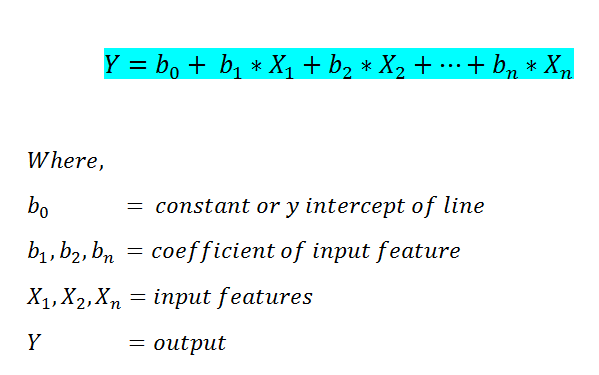

In [42]:
# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [47]:
# Read the CSV file:
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [44]:
# Consider features we want to work on:
X = data[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 
 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y = data["CO2EMISSIONS"]

In [45]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [46]:
print("The original shape of the data is -",data.shape)
print("The shape of the training data is -", train.shape)
print("The shape of the testing data is -", test.shape)

The original shape of the data is - (1067, 13)
The shape of the training data is - (853, 13)
The shape of the testing data is - (214, 13)


In [50]:
train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [48]:
#Modeling:
#Using sklearn package to model data :
regr = linear_model.LinearRegression()

train_x = np.array(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])

train_y = np.array(train["CO2EMISSIONS"])

regr.fit(train_x,train_y)

LinearRegression()

In [51]:
test_x = np.array(test[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
test_y = np.array(test["CO2EMISSIONS"])

In [55]:
# print the coefficient values:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coefficients"])
coeff_data

,Coefficients
ENGINESIZE,7.873147
CYLINDERS,8.408908
FUELCONSUMPTION_CITY,-3.368325
FUELCONSUMPTION_HWY,2.742498
FUELCONSUMPTION_COMB,3.851251
FUELCONSUMPTION_COMB_MPG,-4.082913


In [59]:
#Now let's do prediction of data:
Y_pred = regr.predict(test_x)

In [61]:
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ("R² :",R)

R² : 0.9362912548588905
